In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv('/Users/suryanshpatel/Projects/PDS/student-performance/data-raw/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
set(data['test preparation course'])

{'completed', 'none'}

In [6]:
data['test preparation course'] = data['test preparation course'].map({
    'completed' : 1,
    'none' : 0
})

In [7]:
data['gender'] = data['gender'].map({
    'male' : 1,
    'female' : 0
})

In [8]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,standard,0,72,72,74
1,0,group C,some college,standard,1,69,90,88
2,0,group B,master's degree,standard,0,90,95,93
3,1,group A,associate's degree,free/reduced,0,47,57,44
4,1,group C,some college,standard,0,76,78,75


<Axes: >

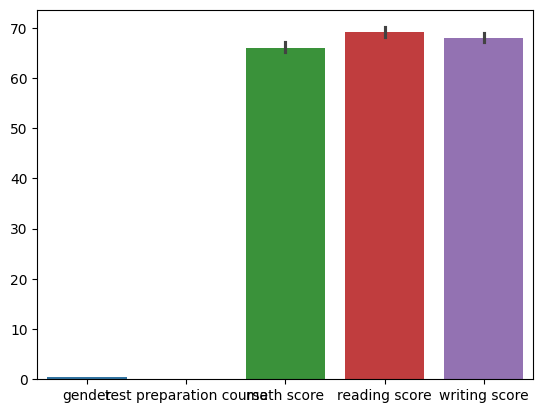

In [42]:
sns.barplot(data)

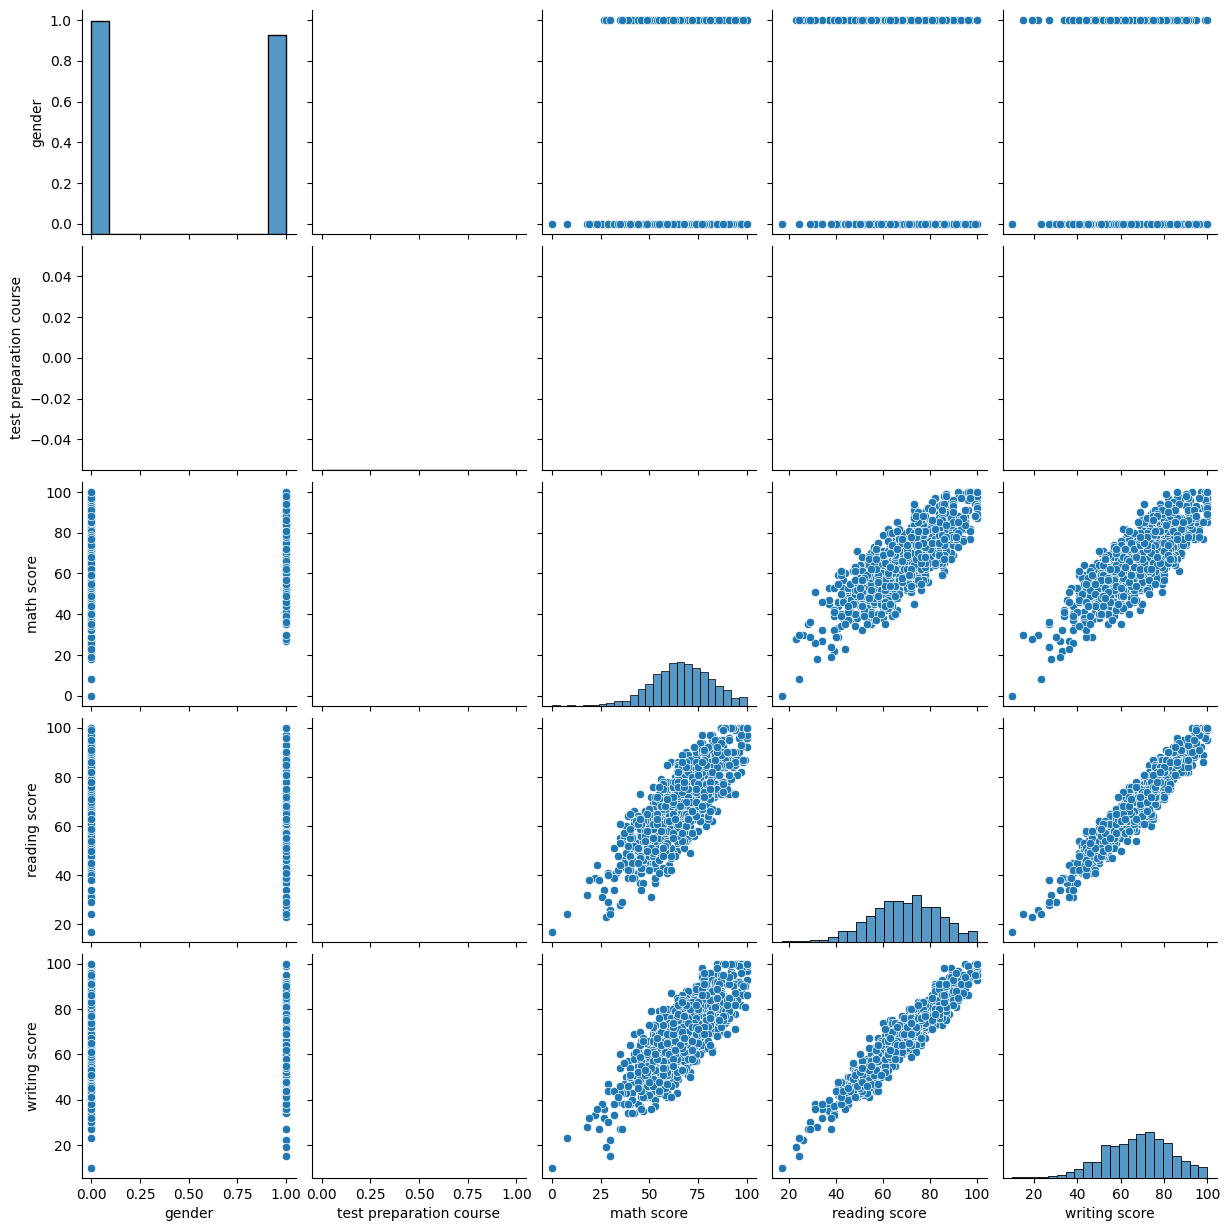

In [43]:
sns.pairplot(data)

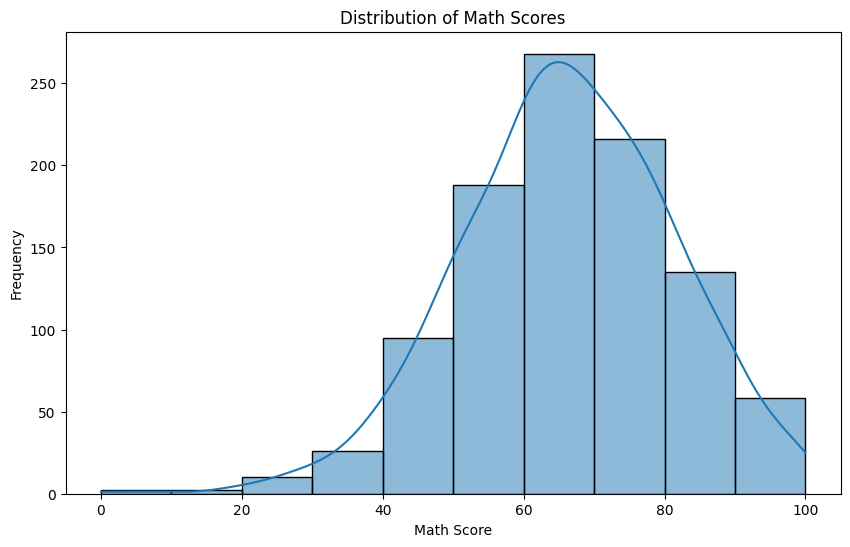

<Figure size 1200x600 with 0 Axes>

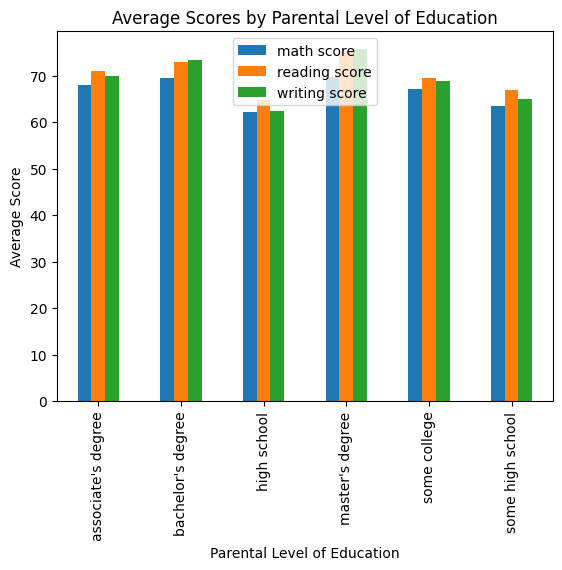

In [45]:
# 1. Distribution of Math Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['math score'], kde=True, bins=10)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

# 2. Parental Level of Education vs. Average Scores
plt.figure(figsize=(12, 6))
data.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().plot(kind='bar')
plt.title('Average Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.show()



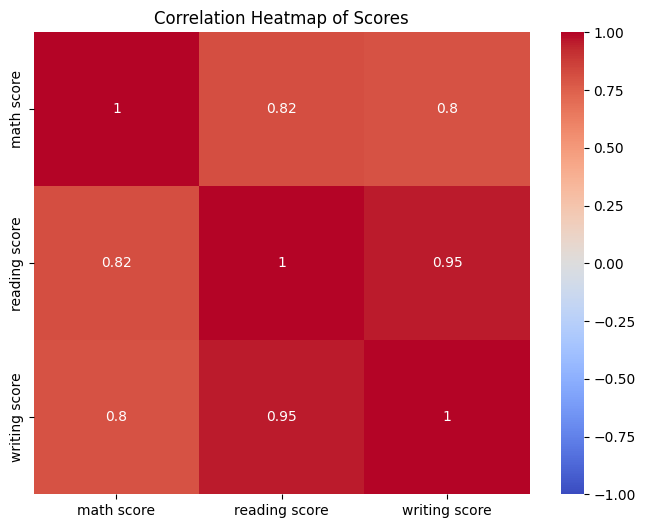

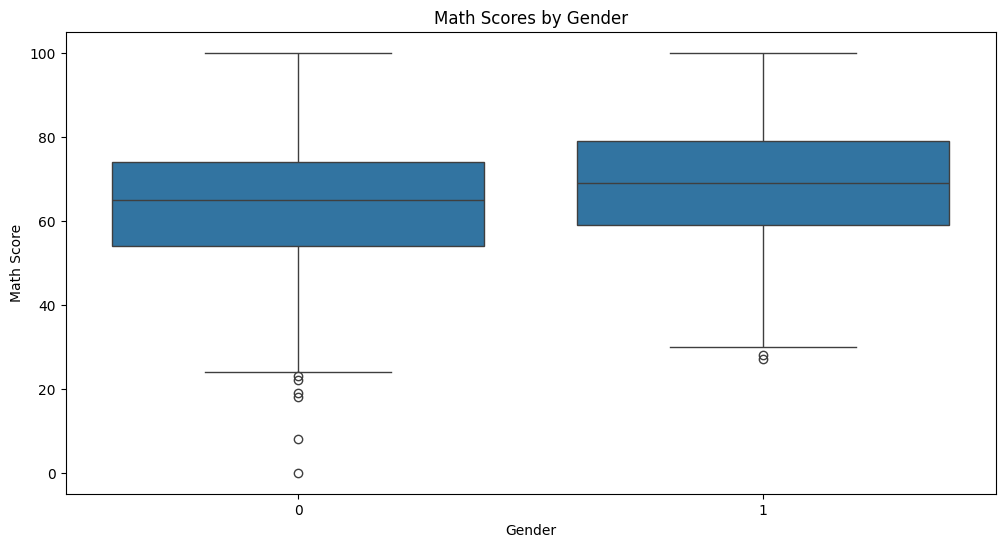

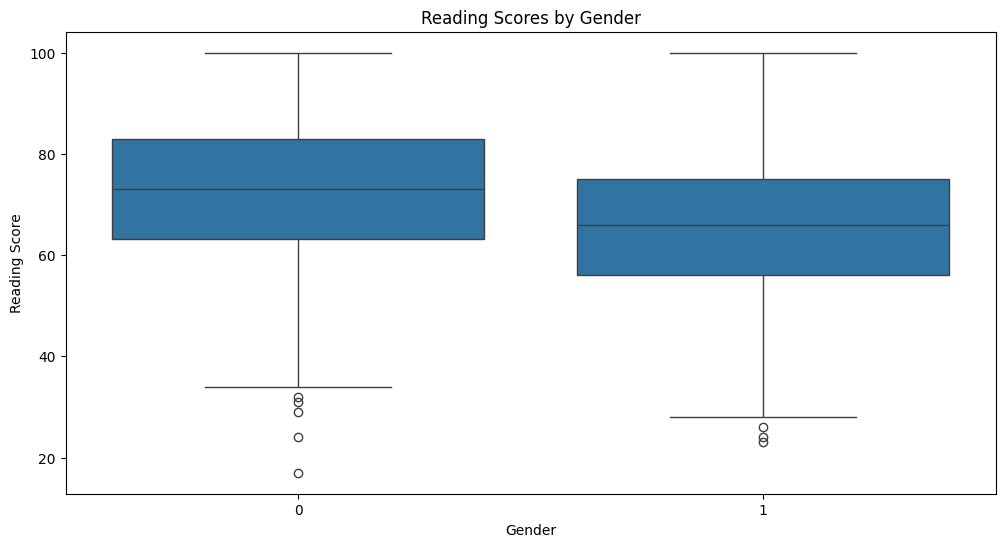

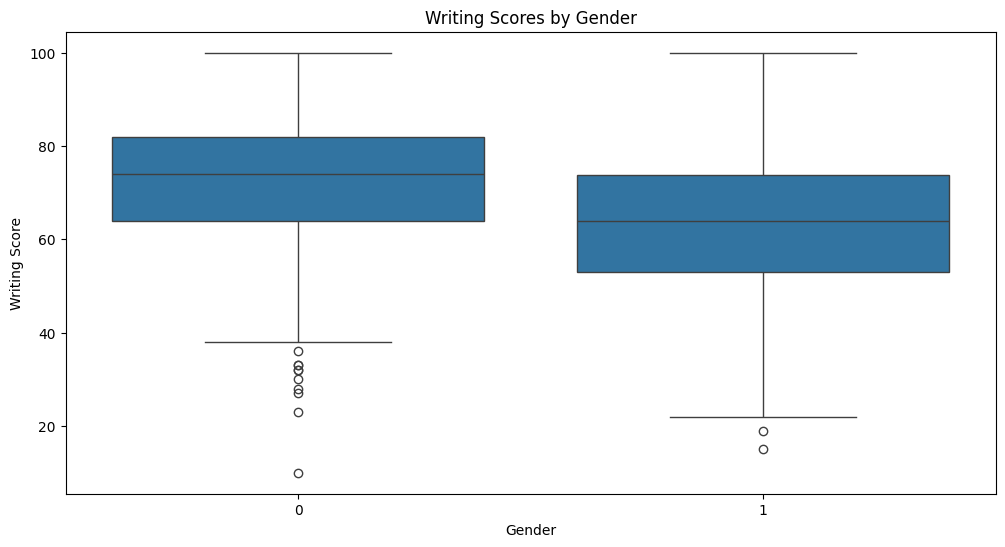

In [50]:

plt.figure(figsize=(8, 6))
corr = data[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Scores')
plt.show()


#Scores by Gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='math score', data=data)
plt.title('Math Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='reading score', data=data)
plt.title('Reading Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Reading Score')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='writing score', data=data)
plt.title('Writing Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Writing Score')
plt.show()



# Conclusions

1. bar plot suggests that the average reading writing and math score is nearly same
2. pairplot suggests that there is +ve relationship between each subjects and some female scores less in every subject compare to male
3. histogram of math score suggests that more then 250 students comes above the range of 60 - 70 and data seems to be normally distibuted
4. heatmap shows exact numbers of correleation we can clearly see that there is no -ve relationship amoung any subjects
5. boxplot gives idea about scores in different subjects based on gender, in math average and highest score of male is greater then female on the other hand female leads in writing and reading scores from male

note - by observation we get more and more clarity about data. for first 2 graph we get the general ideas and feature relationship and followed by individual analysis of scores based on gender

In [10]:
data.to_csv('/Users/suryanshpatel/Projects/PDS/student-performance/data-clean/StudentPerformanceClean.csv')